# Aktia maantiejuoksucup 2018-2019

Kai Puolamäki 10.5.2020

The purpose of this is to demonstrate how to fetch and preprocess dataset and do some initial looking.

The main point is to have sufficient documentation and to script as much as possible: this way if you would like to do the data fetching or preprosessing differently in the future (e.g., you would like to do the same for other years!) then everything would be easy and minimal manual labour would be needed. A good way is to use a Makefile.

This will also make publishing and/or sharing of the data and code much easier. It is easiest if you do the documentation and coding at the same time you fetch the data.

This is important, because some argue that 80% or more of the time in data sciences is spent on dealing with data. Therefore, even small time savings in data preprocessing may mean that you have lots of more time to do the actual analysis.

The data is about 10K races that took place in Vantaa during 2018-2019 during Aktia Maantiejuoksucup, see <https://www.ku-58.fi/kilpailut/maantie-ja-maastokilpailut/aktia_maantiejuoksu_cup/>

In [98]:
aktia <- read.csv("aktia.csv")
weather <- read.csv("weather.csv")

In [99]:
aktia

rank bib name                      club                           time   
1     1   535 Saleva Eero               Helsingin Kisaveikot           31:57  
2     2   537 Harjamäki Joonas          Viipurin Urheilijat            32:38  
3     3   589 Kero Jukka                Turun Urheiluliitto            32:51  
4     4   536 Heikkilä Niklas           Kuusankosken urheiluseura      33:07  
5     5    44 Huusko Samuli             Kenttäurheilija-58             33:13  
6     6   624 Hakala Juuso              Turun Urheiluliitto            33:15  
7     7    19 Fishaye Samuel            Leppävaaran Sisu               33:16  
8     8   166 Salo Jukka                Kenttäurheilija-58             33:20  
9     9   519 Lappalainen Lauri         Team Wassu                     33:45  
10   10   550 Kumpula Jussi             Espoo                          34:19  
11   11   707 Saku Sami                 IF Åland                       34:27  
12   12   585 Antikainen Pekka          Turun Toverit                  34:28  
13   13    52 Juuti Petri               Kenttäurheilija-58             34:32  
14   14   586 Brunila Johannes          Bruno's Physique Club          34:45  
15   15   608 Strömsholm Jani           Kenttäurheilijat-58            34:54  
16   16   541 Heinaro Einari            Helsinkin Suunnistajat         34:58  
17   17   582 Halme Tomi                Finnish Marathon Runners       35:08  
18   18   272 Hakulinen Ossi            Helsinki Triathlon             35:16  
19   19   584 Rissanen Simeon           Vantaan Salamat                35:17  
20   20   697 Virta Jani                Neste United                   35:27  
21   21   595 Järvinen Mikko            Runner's club                  35:30  
22   22   175 Simpanen Juuso            Finnish Marathon Runners       35:37  
23   23   737 Löppönen Juha             Helsingin Jyry                 35:51  
24   24   730 Talvensaari Mikko         Helsinki                       35:51  
25   25   560 Nikander Markus           Länsi-Uudenmaan Urheilijat     36:16  
26   26   543 Partanen Jussi            Helsinki                       36:17  
27   27   720 Saloranta Timo            B12 - Powerwalking Group       36:21  
28   28   714 Helander Iisak            Vantaa                         36:25  
29   29   283 Malm Mikko                Espoon Tapiot                  36:32  
30   30   602 Viitanen Lauri            Downtown 65                    36:34  
⋮    ⋮    ⋮   ⋮                         ⋮                              ⋮      
1314 306  597 Alavalkama Satu           Hki triathlon                  53:15  
1315 307  678 Simons Tiina              Espoo                          53:31  
1316 308  518 Pansegrau Kaarina         Helsinki                       53:31  
1317 309  628 Kälviäinen Teemu          Helsinki                       53:38  
1318 310  276 Huttunen Margit                                          53:50  
1319 311  292 Palvas Leena                                             53:56  
1320 312  706 Hirtentreu Merle          Porvoon Urheilijat             54:09  
1321 313   11 Davey Phil                CSC                            54:10  
1322 314  103 Miettinen Jari            CSC                            54:10  
1323 315  282 Makkonen Minna            Järvenpään pyöräilijät         54:15  
1324 316  571 Heinonen Arianne          Kunnon Polte                   54:29  
1325 317  212 Viljakainen Inca          Länsi-Uudenmaan urheilijat     54:30  
1326 318  321 Leskinen Elina                                           54:38  
1327 319  721 Miettinen Antti           Helsinki                       54:51  
1328 320  162 Saari Tuula               Sykkeen Kaikuja Hyvinkään sair 54:54  
1329 321  266 Andreev Katja             Vantaa                         54:56  
1330 322  302 Tirkkonen Mari            TriathlonSuomi                 55:00  
1331 323  647 Ryhänen Sanna             Nummela 481                    55:04  
1332 324  334 Teileri Taina             Triathlon Suomi

In [100]:
# lets drop the time variable (we don't really need it as we have the time in seconds)
aktia <- aktia[,-5]

In [101]:
# take look at the weather during the races
weather

race cloud airpressure humidity precipitation snowdepth temp cond visibility
1 1    4     1032.4      84       0.0            0         7.1  4.6 45280     
2 2    8     1028.6      95       0.0            0        -0.5 -1.2 41940     
3 3    0     1005.7      94       0.0           32        -5.6 -6.4 47380     
4 4    8     1001.2      99       0.1           47         1.1  1.0  4390     
5 5    8     1012.5      99       0.0           21         2.5  2.3  3670     
  wd  gust ws  
1 274  7.7  5.9
2 359  4.9  3.8
3 259  3.4  2.6
4 189  8.9  6.6
5 217 13.8 10.0

In [102]:
# lets make the race the rowname in the weather table
rownames(weather) <- weather$race
weather

race cloud airpressure humidity precipitation snowdepth temp cond visibility
1 1    4     1032.4      84       0.0            0         7.1  4.6 45280     
2 2    8     1028.6      95       0.0            0        -0.5 -1.2 41940     
3 3    0     1005.7      94       0.0           32        -5.6 -6.4 47380     
4 4    8     1001.2      99       0.1           47         1.1  1.0  4390     
5 5    8     1012.5      99       0.0           21         2.5  2.3  3670     
  wd  gust ws  
1 274  7.7  5.9
2 359  4.9  3.8
3 259  3.4  2.6
4 189  8.9  6.6
5 217 13.8 10.0

In [103]:
# describe method gives you basics stats about the data. 
summary(aktia)

      rank            bib                      name     
 Min.   :  1.0   Min.   :  1.0   Ahdevainio Juha :   5  
 1st Qu.: 67.0   1st Qu.:117.0   Ahokas Jukka    :   5  
 Median :135.0   Median :281.0   Ek Tanja        :   5  
 Mean   :145.3   Mean   :332.8   Heikkerö Peter  :   5  
 3rd Qu.:213.5   3rd Qu.:572.0   Hietalahti Mikko:   5  
 Max.   :357.0   Max.   :750.0   Ignatius Antero :   5  
                                 (Other)         :1313  
                 club          race          seconds    
                   :183   Min.   :1.000   Min.   :1877  
 Kenttäurheilija-58:137   1st Qu.:1.000   1st Qu.:2411  
 Helsinki          : 66   Median :3.000   Median :2655  
 Porvoon Urheilijat: 37   Mean   :2.873   Mean   :2701  
 Espoon Tapiot     : 36   3rd Qu.:4.000   3rd Qu.:2948  
 Vantaa            : 35   Max.   :5.000   Max.   :4724  
 (Other)           :849                                 

In [104]:
# Make race a factor
aktia$race <- factor(aktia$race)
summary(aktia)

      rank            bib                      name     
 Min.   :  1.0   Min.   :  1.0   Ahdevainio Juha :   5  
 1st Qu.: 67.0   1st Qu.:117.0   Ahokas Jukka    :   5  
 Median :135.0   Median :281.0   Ek Tanja        :   5  
 Mean   :145.3   Mean   :332.8   Heikkerö Peter  :   5  
 3rd Qu.:213.5   3rd Qu.:572.0   Hietalahti Mikko:   5  
 Max.   :357.0   Max.   :750.0   Ignatius Antero :   5  
                                 (Other)         :1313  
                 club     race       seconds    
                   :183   1:357   Min.   :1877  
 Kenttäurheilija-58:137   2:284   1st Qu.:2411  
 Helsinki          : 66   3:209   Median :2655  
 Porvoon Urheilijat: 37   4:158   Mean   :2701  
 Espoon Tapiot     : 36   5:335   3rd Qu.:2948  
 Vantaa            : 35           Max.   :4724  
 (Other)           :849                         

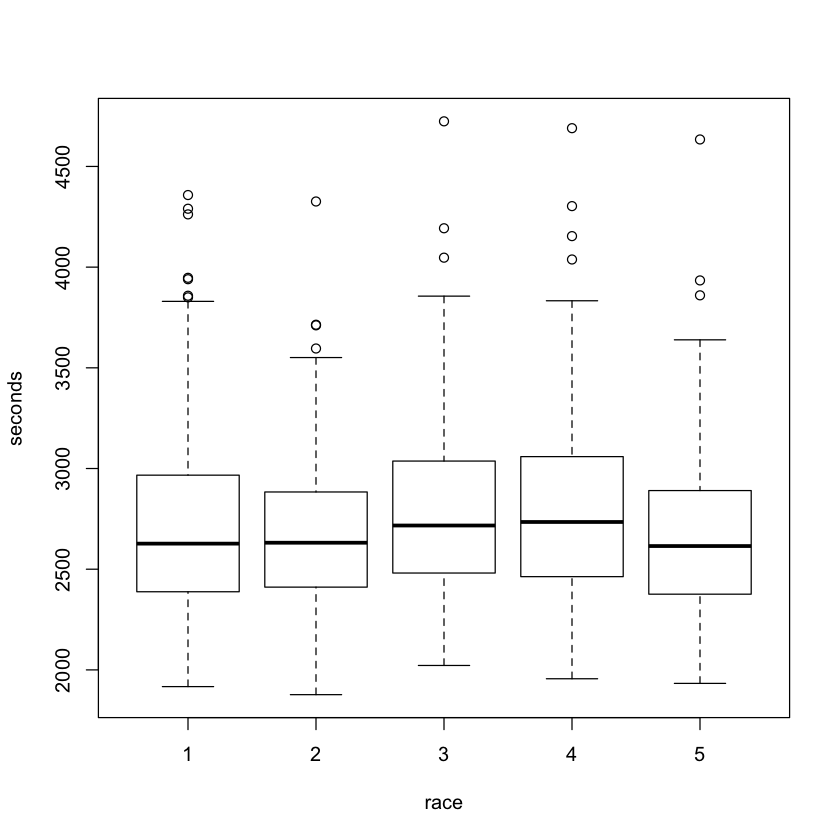

In [105]:
# lets see how race times behave in different races
boxplot(seconds ~ race,aktia)

In [106]:
# looks similar...
# then lets take a look at the mean times of various competitors

times <- aggregate(aktia$seconds,by=list(name=aktia$name),FUN=mean)
times <- times[order(times$x),]

# 10 fastest competitors
times[1:10,]

name              x   
59  Granberg Hannu    1877
451 Saleva Eero       1925
130 Jantunen Panu     1941
560 Valido Toni       1952
85  Heikkilä Niklas   1987
170 Kero Jukka        1991
65  Hakala Juuso      1995
117 Huusko Samuli     2009
51  Fishaye Samuel    2018
232 Lappalainen Lauri 2025

In [107]:
library(GGally)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



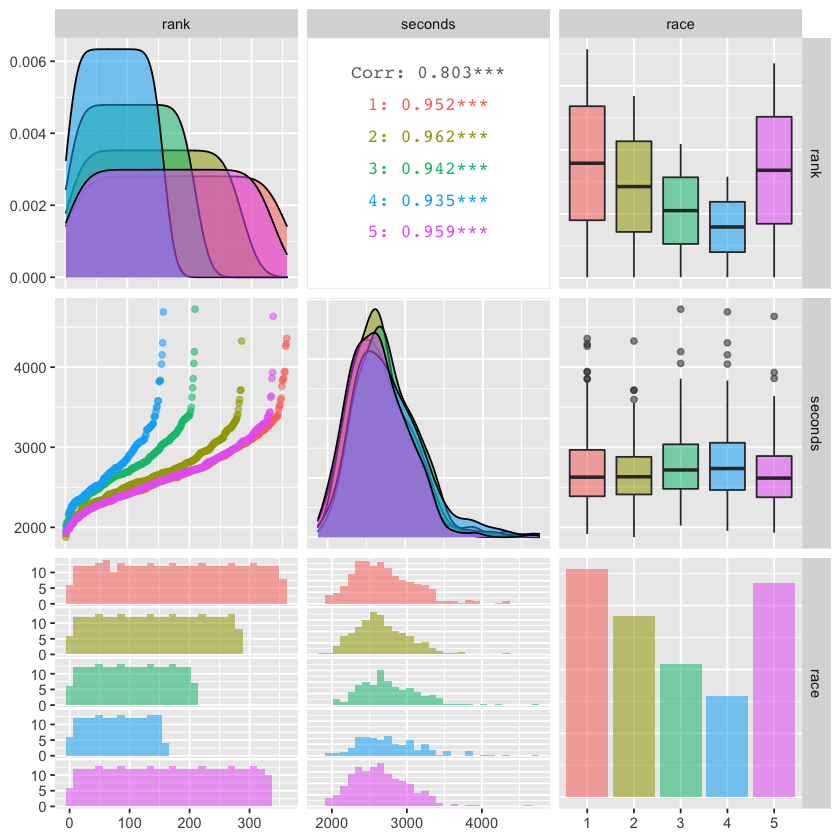

In [108]:
ggpairs(aktia[,c("rank","seconds","race")],aes(color=race,alpha=0.4))

In [109]:
# lets then merge the weather data to the dataframe.
data <- merge(aktia,weather,by="race")
data

race rank bib name                      club                          
1    1     1   535 Saleva Eero               Helsingin Kisaveikot          
2    1     2   537 Harjamäki Joonas          Viipurin Urheilijat           
3    1     3   589 Kero Jukka                Turun Urheiluliitto           
4    1     4   536 Heikkilä Niklas           Kuusankosken urheiluseura     
5    1     5    44 Huusko Samuli             Kenttäurheilija-58            
6    1     6   624 Hakala Juuso              Turun Urheiluliitto           
7    1     7    19 Fishaye Samuel            Leppävaaran Sisu              
8    1     8   166 Salo Jukka                Kenttäurheilija-58            
9    1     9   519 Lappalainen Lauri         Team Wassu                    
10   1    10   550 Kumpula Jussi             Espoo                         
11   1    11   707 Saku Sami                 IF Åland                      
12   1    12   585 Antikainen Pekka          Turun Toverit                 
13   1    13    52 Juuti Petri               Kenttäurheilija-58            
14   1    14   586 Brunila Johannes          Bruno's Physique Club         
15   1    15   608 Strömsholm Jani           Kenttäurheilijat-58           
16   1    16   541 Heinaro Einari            Helsinkin Suunnistajat        
17   1    17   582 Halme Tomi                Finnish Marathon Runners      
18   1    18   272 Hakulinen Ossi            Helsinki Triathlon            
19   1    19   584 Rissanen Simeon           Vantaan Salamat               
20   1    20   697 Virta Jani                Neste United                  
21   1    21   595 Järvinen Mikko            Runner's club                 
22   1    22   175 Simpanen Juuso            Finnish Marathon Runners      
23   1    23   737 Löppönen Juha             Helsingin Jyry                
24   1    24   730 Talvensaari Mikko         Helsinki                      
25   1    25   560 Nikander Markus           Länsi-Uudenmaan Urheilijat    
26   1    26   543 Partanen Jussi            Helsinki                      
27   1    27   720 Saloranta Timo            B12 - Powerwalking Group      
28   1    28   714 Helander Iisak            Vantaa                        
29   1    29   283 Malm Mikko                Espoon Tapiot                 
30   1    30   602 Viitanen Lauri            Downtown 65                   
⋮    ⋮    ⋮    ⋮   ⋮                         ⋮                             
1314 5    306  597 Alavalkama Satu           Hki triathlon                 
1315 5    307  678 Simons Tiina              Espoo                         
1316 5    308  518 Pansegrau Kaarina         Helsinki                      
1317 5    309  628 Kälviäinen Teemu          Helsinki                      
1318 5    310  276 Huttunen Margit                                         
1319 5    311  292 Palvas Leena                                            
1320 5    312  706 Hirtentreu Merle          Porvoon Urheilijat            
1321 5    313   11 Davey Phil                CSC                           
1322 5    314  103 Miettinen Jari            CSC                           
1323 5    315  282 Makkonen Minna            Järvenpään pyöräilijät        
1324 5    316  571 Heinonen Arianne          Kunnon Polte                  
1325 5    317  212 Viljakainen Inca          Länsi-Uudenmaan urheilijat    
1326 5    318  321 Leskinen Elina                                          
1327 5    319  721 Miettinen Antti           Helsinki                      
1328 5    320  162 Saari Tuula               Sykkeen Kaikuja Hyvinkään sair
1329 5    321  266 Andreev Katja             Vantaa                        
1330 5    322  302 Tirkkonen Mari            TriathlonSuomi                
1331 5    323  647 Ryhänen Sanna             Nummela 481                   
1332 5    324  334 Teileri Taina             Triathlon Suomi               
1333 5    325  286 Miettinen Tiina                                         
1334 5    326  520 Puustinen Paula           Tonin ju

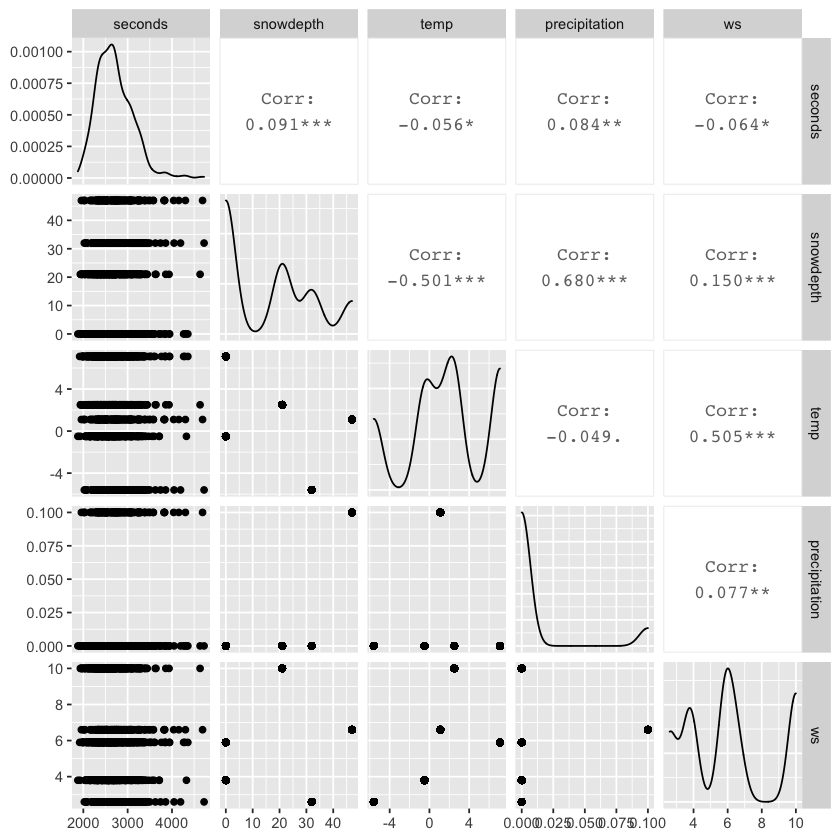

In [110]:
ggpairs(data[,c("seconds","snowdepth","temp","precipitation","ws")])

In [111]:
summary(data)

 race         rank            bib                      name     
 1:357   Min.   :  1.0   Min.   :  1.0   Ahdevainio Juha :   5  
 2:284   1st Qu.: 67.0   1st Qu.:117.0   Ahokas Jukka    :   5  
 3:209   Median :135.0   Median :281.0   Ek Tanja        :   5  
 4:158   Mean   :145.3   Mean   :332.8   Heikkerö Peter  :   5  
 5:335   3rd Qu.:213.5   3rd Qu.:572.0   Hietalahti Mikko:   5  
         Max.   :357.0   Max.   :750.0   Ignatius Antero :   5  
                                         (Other)         :1313  
                 club        seconds         cloud        airpressure  
                   :183   Min.   :1877   Min.   :0.000   Min.   :1001  
 Kenttäurheilija-58:137   1st Qu.:2411   1st Qu.:4.000   1st Qu.:1006  
 Helsinki          : 66   Median :2655   Median :8.000   Median :1012  
 Porvoon Urheilijat: 37   Mean   :2701   Mean   :5.692   Mean   :1019  
 Espoon Tapiot     : 36   3rd Qu.:2948   3rd Qu.:8.000   3rd Qu.:1032  
 Vantaa            : 35   Max.   :4724   Max.   

In [112]:
model <- lm(seconds ~ snowdepth+temp+precipitation+ws+name,
            data)
summary(model)


Call:
lm(formula = seconds ~ snowdepth + temp + precipitation + ws + 
    name, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-391.40  -24.23    0.00   19.66  497.87 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   2781.1019    75.5667  36.803  < 2e-16 ***
snowdepth                        3.5958     0.3519  10.217  < 2e-16 ***
temp                             5.7149     1.2375   4.618 4.57e-06 ***
precipitation                 -395.3773   133.0599  -2.971 0.003061 ** 
ws                             -15.0643     1.5291  -9.852  < 2e-16 ***
nameAakula Riikka               46.6500    87.1673   0.535 0.592688    
nameAalto Josefina            -105.5274    92.4478  -1.141 0.254041    
nameAalto Martin              -129.7982   106.7371  -1.216 0.224354    
nameAaltonen Toni               40.8717    92.3021   0.443 0.658038    
nameAbsetz Ilmari              173.5827    87.0638   1.994 0.046549 *  
nameA